In [1]:
import pandas as pd
from pylab import *
%matplotlib inline

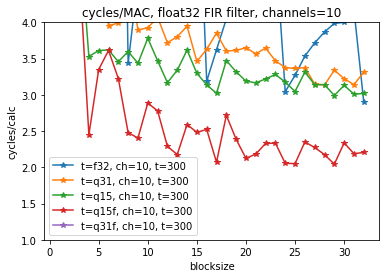

In [64]:
clock_speed = 400e6
def load_data(fn):
    data_f32 = pd.read_csv(fn, dtype={'type':str})
    data_f32 = data_f32.rename(columns=lambda x: x.strip())
    data_f32['time'] = data_f32['time_ns']/1e9
    data_f32['cycles'] = clock_speed * data_f32['time']
    data_f32['calculations'] = data_f32['channels'] * data_f32['blocksize'] * data_f32['ntaps']
    data_f32['cycles_per_calc'] = data_f32['cycles']/data_f32['calculations']
    data_f32['ns'] = data_f32['calculations']/data_f32['time']
    return data_f32

def get_data_chan_taps(data, dtype, nchan, ntaps):
    return  data.loc[(data['type']     == dtype) &
                 (data['channels'] == nchan) &
                 (data['ntaps']    == ntaps)]
    return r

def plot_data(dtypes, data, nchan, ntapss, ylimit=None):
    for dtype in dtypes:
        for ntaps in ntapss:
            df = get_data_chan_taps(data, dtype, nchan, ntaps)
            plot(df['blocksize'], df['cycles_per_calc'], "*-", label=f"t={dtype}, ch={nchan}, t={ntaps}")
    xlabel("blocksize")
    ylabel("cycles/calc")
    if ylimit is not None:
        ylim(ylimit[0], ylimit[1])
    title(f"cycles/MAC, float32 FIR filter, channels={nchan}")
    legend()
    show()

data = load_data("fir_filter.csv")
plot_data(["f32", "q31", "q15", "q15f", "q31f"], data, nchan = 10, ntapss = [300], ylimit=[1,4])



In [22]:
data

,type,channels,blocksize,ntaps,time_ns,time,cycles,calculations,cycles_per_calc,ns
0,q31,1,1,10,1270,0.000001,508.0,10,50.800000,7.874016e+06
1,q31,1,1,11,1090,0.000001,436.0,11,39.636364,1.009174e+07
2,q31,1,1,12,1060,0.000001,424.0,12,35.333333,1.132075e+07
3,q31,1,1,13,1170,0.000001,468.0,13,36.000000,1.111111e+07
4,q31,1,1,14,1130,0.000001,452.0,14,32.285714,1.238938e+07
5,q31,1,1,15,1110,0.000001,444.0,15,29.600000,1.351351e+07
6,q31,1,1,16,1100,0.000001,440.0,16,27.500000,1.454545e+07
7,q31,1,1,17,1190,0.000001,476.0,17,28.000000,1.428571e+07
8,q31,1,1,18,1100,0.000001,440.0,18,24.444444,1.636364e+07
9,q31,1,1,19,1200,0.000001,480.0,19,25.263158,1.583333e+07
